In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)


In [4]:
sns.set_style("whitegrid") # Plotting style
%matplotlib inline # Plots show up in notebook
np.random.seed(7) # seeding random number generator

UsageError: unrecognized arguments: # Plots show up in notebook


## 1. Quick look at the raw data

In [115]:
csv = "1429_1.csv"
df = pd.read_csv(csv)
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


1. With the reviews.text column, we may be able to improve sentiment analysis with the actual review rating column doRecommend (boolean)
2. We can label every review depending on their sentiment 
    * title might have positive/negative info regarding the review

In [116]:
data = df.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


Based on the descriptive statistics shown above, we may conclude::

1. Mean review score is 4.58, with low standard deviation
    * Most of positive reviews starts from 2nd quartile
2. The mean for helpful number of reviews(reviews.numHelpful) is 0.6 but with high standard deviation
    * The data are pretty spread out around the mean, 
    * Obviously, we can’t have negative people finding something helpful, this is only on the right side
    * The range of most reviews will be between 0-13 people finding helpful (reviews.numHelpful)
3. The most helpful review was helpful to 814 people
    * This could be a detailed, rich and important review that will be worth looking at

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

On the basis of information above:

* Drop columns with float values for exploratory analysis. Such as:
    * reviews.userCity, 
    * reviews.userProvince, 
    * reviews.id, and 
    * reviews.didPurchase 
* Not every category has the most values in respect to the overall amount of values.
* Good news: reviews.text category has minimum missing data (34659/34660)
* Because we have 7000 missing data, we need to clean up the name column by referring asins (unique products).

In [118]:
data["asins"].unique()


array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [119]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 42


### Visualizing numerical variables:

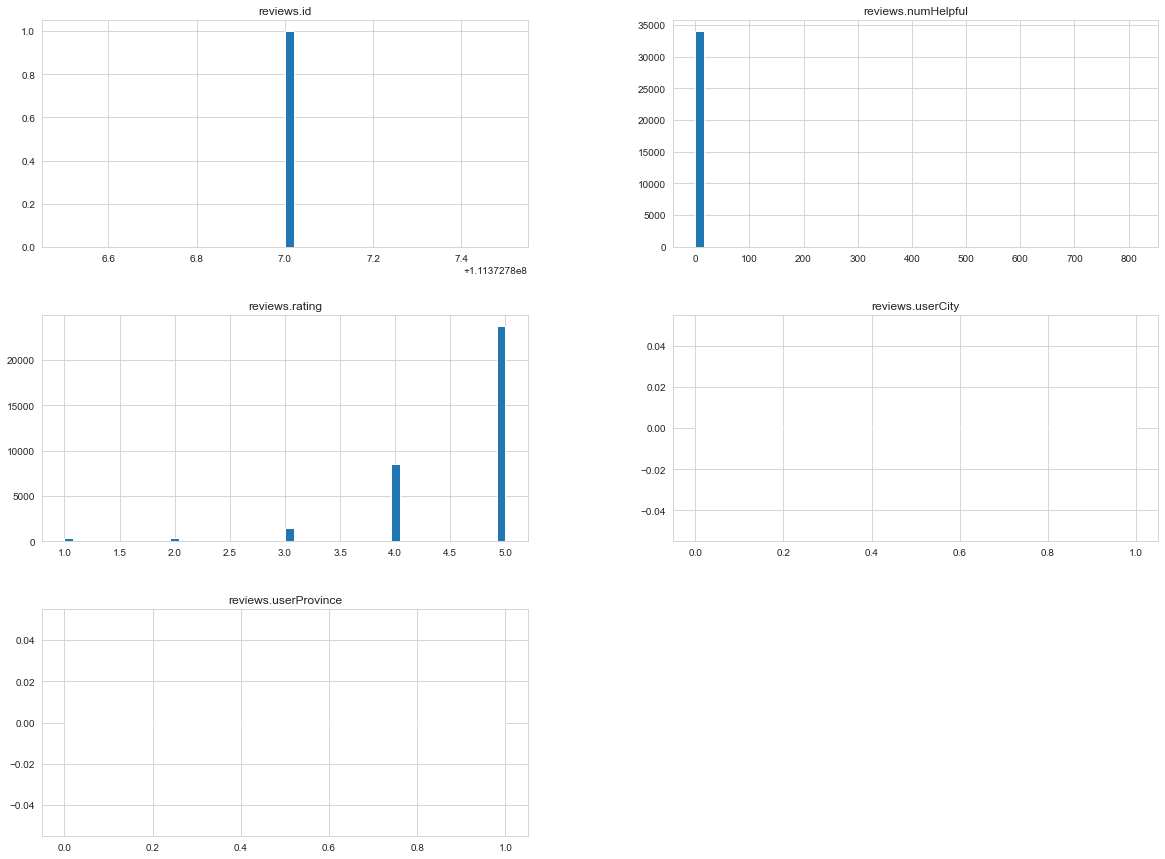

In [121]:
# Builds histogram for different columns
data.hist(bins=50, figsize=(20,15))
plt.show()

##### Based on the distributions above:

1. reviews.numHelpful: Outliers in this case are valuable, but we might have to put weight on reviews that have more than 50+ helpful likes, meaning its on of the good comments.
2. reviews.rating: The vast majority of cases were evaluated positively (looking at rating distribution). There are twice as many 5 star ratings as there are other ratings combined.

## 2. Split into Train/Test
* Before exploring the dataset, we divide it into a training set and a test set 
* Our goal is eventually to  train a seed analysis classifier 
* Since most of the  reviews are positive (5 stars), we have to do a ford. review the scores to ensure  we are not training the classifier on imbalanced data. 
* To use Sklearn's Stratified ShuffleSplit class, we remove all samples that have NAN in their review points, and then mask all review points. integer data type

In [125]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before dropping NaNs: {}".format(len(data)))
processed_data = data.dropna(subset=["reviews.rating"])
# Removes null values in reviews.rating
print("After dropping NaNs: {}".format(len(processed_data)))
processed_data["reviews.rating"] = processed_data["reviews.rating"].astype(int)

Before dropping NaNs: 34660
After dropping NaNs: 34627


In [128]:
splitter = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in splitter.split(dataAfter,
                                           dataAfter["reviews.rating"]): 
    st_train = processed_data.reindex(train_index)
    st_test = processed_data.reindex(test_index)

#### Checking if train/test sets were stratified proportionately to raw data.

In [132]:
len(st_train)

27701

In [133]:
st_train["reviews.rating"].value_counts(normalize = True)

5.0    0.687215
4.0    0.245790
3.0    0.044121
2.0    0.011563
1.0    0.011310
Name: reviews.rating, dtype: float64

In [134]:
len(st_test)

6926

In [135]:
st_test["reviews.rating"].value_counts(normalize = True)

5.0    0.684971
4.0    0.250867
3.0    0.039884
1.0    0.012572
2.0    0.011705
Name: reviews.rating, dtype: float64

## 3. Data Exploration (Training Set)

We use regular expressions to remove all bad characters from our dataset and then preview what the data will look like after cleaning.

In [137]:
reviews = st_train.copy()
reviews.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
19541,AV1YnRtnglJLPUi8IJmV,Amazon Kindle Paperwhite - eBook reader - 4 GB...,B00OQVZDJM,Amazon,"Walmart for Business,Office Electronics,Tablet...","amazon/b00oqvzdjm,848719056099,amazonkindlepap...",Amazon,2017-06-09T00:00:00.000Z,2017-09-05T22:09:30Z,"2017-08-31T22:33:09.035Z,2017-08-02T19:54:13.7...",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/9439005/review...,Like the fact that it is strictly an e-reader....,Kindle Paperwhite,NaN,NaN,GoodWitch1692
14694,AVpftoij1cnluZ0-p5n2,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B00IOYAM4I,Amazon,"Computers & Tablets,E-Readers & Accessories,eB...","amazonkindlevoyage4gbwifi3gblack/9301112,amazo...",Amazon,2015-07-23T00:00:00.000Z,2017-09-19T15:09:00Z,"2017-09-09T09:54:00.000Z,2017-08-31T22:37:00.0...",...,True,NaN,1.0,5.0,http://reviews.bestbuy.com/3545/9301112/review...,"I got this product for my boyfriend, and he ab...",Small and slim,NaN,NaN,katgranite
8361,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2017-03-17T00:00:00.000Z,2017-05-21T01:27:59Z,"2017-04-30T00:10:00.000Z,2017-06-07T08:15:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,"On sale for my 3 year old and he loves it, mos...",Great price!,NaN,NaN,Tash
34412,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2015-11-06T00:00:00.000Z,2017-09-20T05:35:50Z,2017-08-25T21:44:54.261Z,...,True,NaN,1.0,4.0,http://reviews.bestbuy.com/3545/4370400/review...,"Overall, my kids love it. I originally had a d...",Great Product,NaN,NaN,niner2016
5307,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-24T00:00:00.000Z,2017-05-21T01:24:08Z,"2017-04-30T00:09:00.000Z,2017-06-07T08:17:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,I got this tablet on a sale. I think it was $3...,Great value,NaN,NaN,Jtaylor9


Next, we will explore the following columns:

* asins
* name
* reviews.rating
* reviews.doRecommend
* (reviews.numHelpful – not possible since numHelpful is only between 0-13 as per previous analysis in Raw Data)
* (reviews.text – not possible since text is in long words)

Also, we will explore columns to asins

## 4.1 names / ASINs

In [139]:
print(f'Reviews for product categoried by name: {len(reviews["name"].unique())}')
print(f'Reviews for product categoried by asins: {len(reviews["asins"].unique())}')

Reviews for product categoried by name: 47
Reviews for product categoried by asins: 36


In [140]:
reviews.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 19541 to 6028
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27674 non-null  object 
 1   name                  22266 non-null  object 
 2   asins                 27672 non-null  object 
 3   brand                 27674 non-null  object 
 4   categories            27674 non-null  object 
 5   keys                  27674 non-null  object 
 6   manufacturer          27674 non-null  object 
 7   reviews.date          27651 non-null  object 
 8   reviews.dateAdded     19225 non-null  object 
 9   reviews.dateSeen      27674 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27247 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27293 non-null  float64
 14  reviews.rating        27674 non-null  float64
 15  reviews.sourceUR

Working hypothesis: there are only 35 products based on the training data ASINs

* There are 47 product names, asins are unique though
* There is a one to many relationship between ASINs and names. ASINs are important than names since we’re concerned with products.
* A single ASIN can have many names due to different vendor listings
* There could also a lot of missing names/more unique names with slight variations in title (ie. 16mm vs 16 mm, NAN for product names)


In [86]:
reviews.groupby("asins")["name"].unique()

asins
B005PB2T0S               [Kindle Keyboard,,,\r\nKindle Keyboard,,,, Ama...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00DU15MU4               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00IOY8XWQ               [Kindle Voyage E-reader, 6 High-Resolution Dis...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Echo (White),,,\r\nEcho (White),,,, Amazon Fi...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE         

Note: there are actually 34 ASINs with one of the product having 2 ASINs

In [87]:
# Analysing different names for products with 2 ASINs
different_names = reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)

Echo (White),,,
Echo (White),,,
Amazon Fire Tv,,,
Amazon Fire Tv,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
nan
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,
New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,
Kindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs),,
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReade

In [88]:
reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts()

Echo (White),,,\r\nEcho (White),,,                                                                                                                                                                                  2283
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                                                                                                                              2011
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,                                                                           261
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,\r\nAmazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,                                                           105
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 9W PowerFast Offici

## Confirmed our hypothesis that each ASIN can have multiple names. Therefore, we should only care about which ASINs perform well, not  product names.

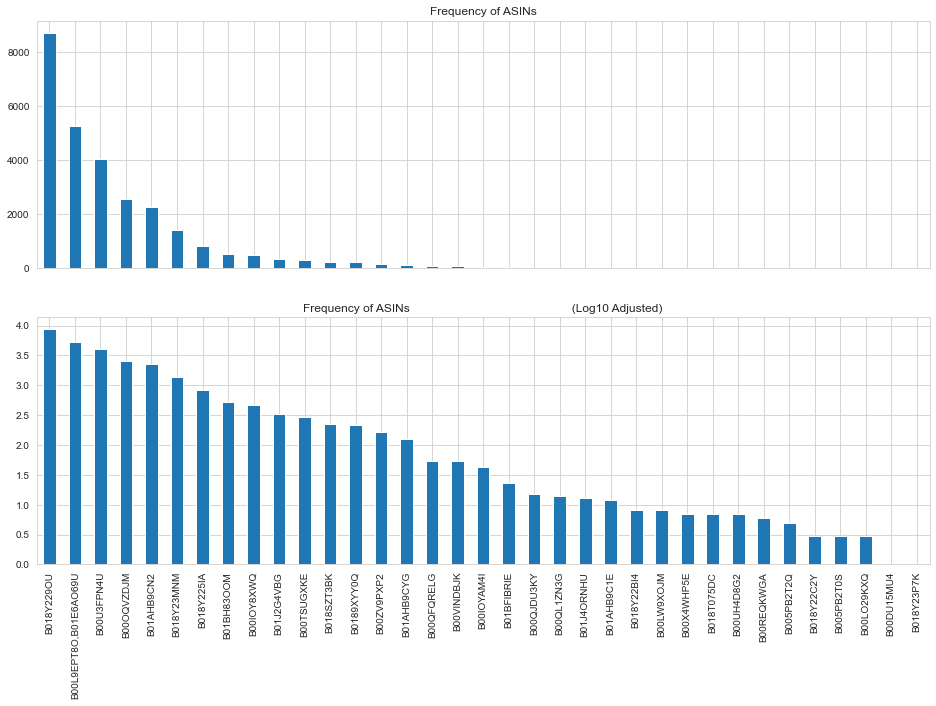

In [141]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title = "Frequency of ASINs")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, 
                                               title="Frequency of ASINs \
                                               (Log10 Adjusted)") 
plt.show()

* Based on the ASIN bar chart, we can see that certain products have significantly more reviews than others. This may indicate higher sales of certain products, suggesting higher sales of certain products, and is consistent with the high ASIN frequency of 
* Data normalized ASIN log to view detailed diagrams for each ASIN. We can see that the distribution still follows a "right-handed" distribution.

### This answers the first question that certain ASINs (products) have better sales, while other ASINs have lower sale, and in turn dictates which products should be kept or dropped.

In [90]:
# Entire training dataset average rating
reviews["reviews.rating"].mean()

4.587774124787745

## 4.2 reviews.rating / ASINs

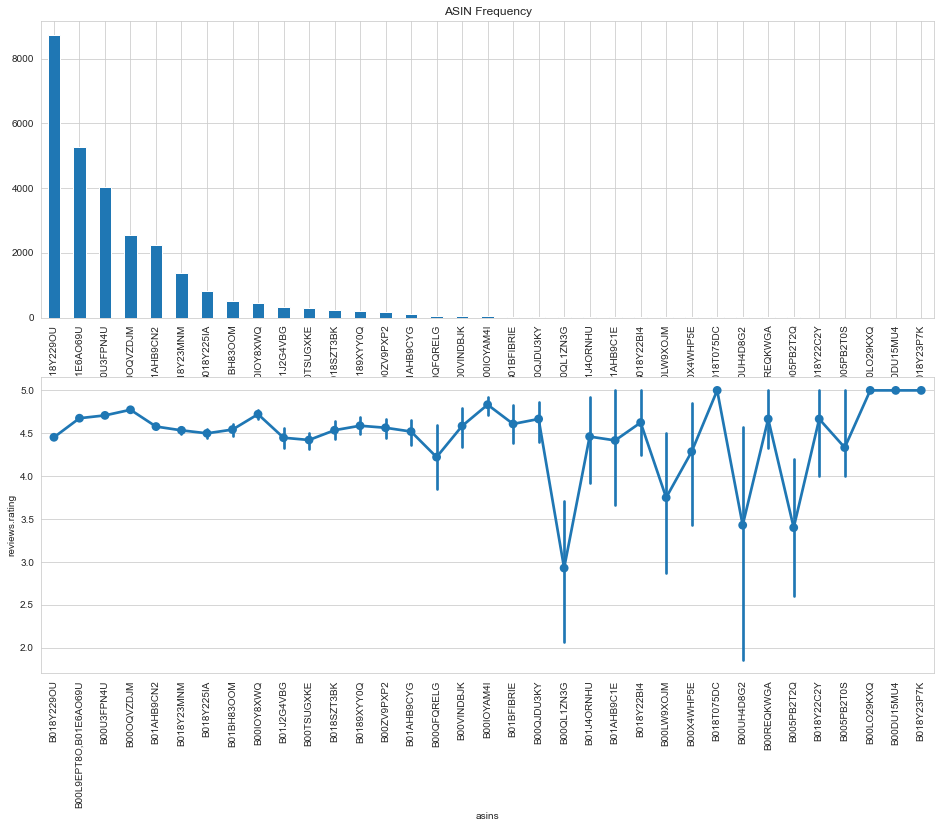

In [142]:
asins_count_iy = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_iy, data=reviews)
plt.xticks(rotation=90)
plt.show()

1. The average reviews for the most frequently reviewed products range from .5 to .8, but the difference is small. 
     * Although there is a slightly inverse relationship between ASIN frequency level and average reviews for the first ASINs, this relationship is not significant because the average review rating for the first ASINs is between .5 and .8, which is generally considered good  reviews,
2. When the ASINs are lower, as shown in the bar chart (above), we see that the scatter chart (below) of their respective average reviews has significantly more variation, as indicated by the length of the vertical lines. As a result, we suggest that the average review ratings of lower frequency ASINs  are not relevant to our analysis due to the large variation. 
     * On the other hand, since these are ASINs with a lower frequency, we suggest that this is due to poor quality products. 
     * In addition, the last four ASINs have no difference due to their significantly lower frequency, and although the review ratings are a perfect 5.0,  we do not consider  these reviews important due to their lower frequency. explained in point (2)

### Note that point-plot graph automatically takes the average of the review.rating data



## 4.3 reviews.doRecommend / ASINs


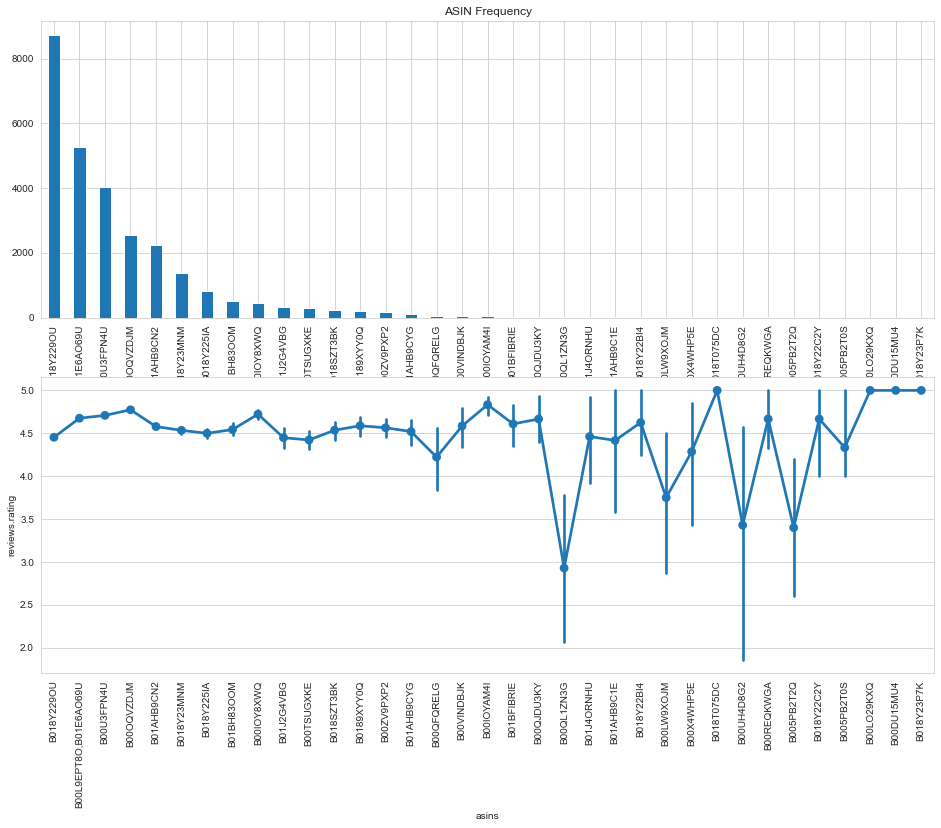

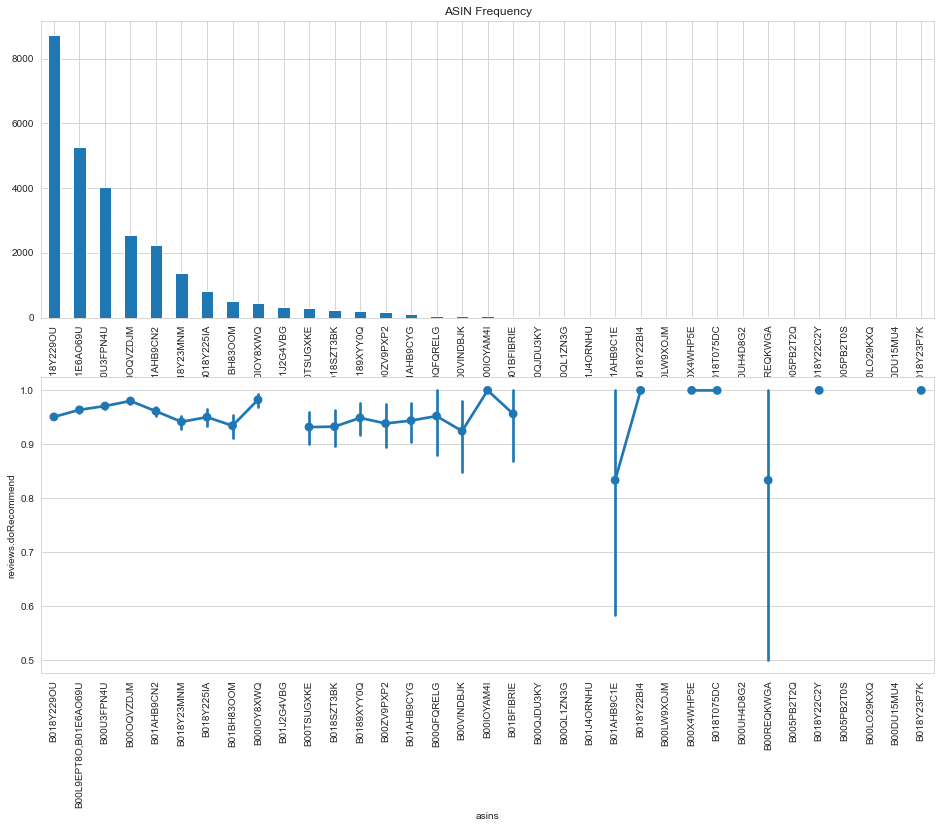

In [143]:
asins_count_iy = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_iy, data=reviews)
plt.xticks(rotation=90)
plt.show()
plt.subplots (2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_iy,
              data=reviews)
plt.xticks(rotation=90)
plt.show()

From this analysis, we can see that the first 19 ASINs show that consumers recommend the product, which is consistent with the "reviews.rating / ASIN" analysis above, where the first 19 ASINs have good ratings between 
.0 and 5.0. 
Remaining Results for ASINs differ due to the smaller sample size, which should not be taken into account

##### Note: For sentiment analysis we will analyse reviews.text



## 5 Correlations


In [145]:
correlation_matrix = reviews.corr()
correlation_matrix
# Here we can analyze reviews.ratings with asins

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.id,NaN,NaN,NaN,NaN,NaN
reviews.numHelpful,NaN,1.000000,-0.042066,NaN,NaN
reviews.rating,NaN,-0.042066,1.000000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN


In [146]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 19541 to 6028
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27674 non-null  object 
 1   name                  22266 non-null  object 
 2   asins                 27672 non-null  object 
 3   brand                 27674 non-null  object 
 4   categories            27674 non-null  object 
 5   keys                  27674 non-null  object 
 6   manufacturer          27674 non-null  object 
 7   reviews.date          27651 non-null  object 
 8   reviews.dateAdded     19225 non-null  object 
 9   reviews.dateSeen      27674 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27247 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27293 non-null  float64
 14  reviews.rating        27674 non-null  float64
 15  reviews.sourceUR

In [147]:
counts_asin = reviews["asins"].value_counts().to_frame()
counts_asin.head()

,asins
B018Y229OU,8723
"B00L9EPT8O,B01E6AO69U",5277
B00U3FPN4U,4038
B00OQVZDJM,2552
B01AHB9CN2,2249


In [148]:
mean_rating = reviews.groupby("asins")["reviews.rating"].mean().to_frame()
mean_rating.head()

,reviews.rating
asins,
B005PB2T0S,4.333333
B005PB2T2Q,3.400000
B00DU15MU4,5.000000
B00IOY8XWQ,4.722343
B00IOYAM4I,4.833333


In [163]:
table = reviews.groupby('asins').agg({'asins':'count', 'reviews.rating':'mean'})
table.rename(columns = {'asins':'count'}, inplace=True)
table.sort_values('count', ascending=False)

,count,reviews.rating
asins,,
B018Y229OU,8723,4.453284
"B00L9EPT8O,B01E6AO69U",5277,4.675573
B00U3FPN4U,4038,4.708519
B00OQVZDJM,2552,4.773903
B01AHB9CN2,2249,4.578479
B018Y23MNM,1389,4.534197
B018Y225IA,827,4.499395
B01BH83OOM,521,4.543186
B00IOY8XWQ,461,4.722343


In [164]:
# table_counts_rating = counts_asin.join(mean_rating)
# table_counts_rating.head(30)

,count,reviews.rating
count,1.000000,0.114286
reviews.rating,0.114286,1.000000


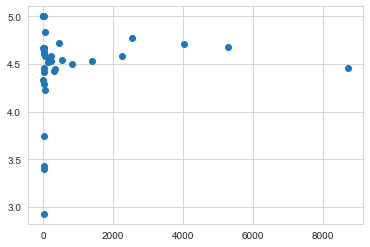

In [165]:
plt.scatter("count", "reviews.rating", data=table)
table.corr()

Based on our analysis above of mapping ASINs and reviews.rating data, we found that many low prevalence ASINs have large variances, concluding that these low prevalence ASINs are not significant in our analysis due to the small sample size. . 
 Similarly, in a correlation analysis between ASINs and reviews.rating, we find almost no correlation with results.

## 6. Sentiment Analysis


Using the features in place, we will build a classifier that can determine a review’s sentiment.



## 6.1 Set Target Variable (Sentiments)


In [170]:
def num_sentiment(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
st_train["Sentiment"] = st_train["reviews.rating"].apply(num_sentiment)
st_test["Sentiment"] = st_test["reviews.rating"].apply(num_sentiment)
st_train["Sentiment"][:20]

19541    Positive
14694    Positive
8361     Positive
34412    Positive
5307     Positive
24490    Positive
33117    Positive
357      Positive
12475    Positive
12697    Positive
12679    Positive
9678     Positive
15100    Positive
22583    Positive
9126     Positive
20993    Positive
535      Positive
27439    Positive
10365    Positive
11504    Positive
Name: Sentiment, dtype: object

In [171]:
# Prepare data
X_train = st_train["reviews.text"]
X_train_target_sentiment = st_train["Sentiment"]
X_test = st_test["reviews.text"]
X_test_target_sentiment = st_test["Sentiment"]
print(f"length of X_train: {len(X_train)}")
print(f"length of X_test: {len(X_test)}")

length of X_train: 27701
length of X_test: 6926


## 6.2 Extract Features




Here we convert the content into numeric feature vectors using the Bag of Words strategy: 
 * Give each word occurrence a fixed integer ID (integer indices into the dictionary of word occurrences) 
 * X[i,j] where i is the integer indices. , j is the occurrence of the word  and X is the number of words (our training set ) 
 To implement the bag-of-words strategy, we  use SciKit-Learn's CountVectorizer to do the following: 
 * Text- preprocessing: 
     * Tokenize (break) sentences into words) 
     * Stop words (filter "the", "on", etc.) 
     * Count occurrences (builds a dictionary of features from integer indices of word frequency) 
 *  Vector of features (converts ). dictionary of text documents to feature vector)

In [172]:
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_target_sentiment = X_train_target_sentiment.fillna(' ')
X_test_target_sentiment = X_test_target_sentiment.fillna(' ')
# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(27701, 12558)

Here we have 27,701 training samples and 12,526 distinct words in our training sample.

Also, with longer documents, we typically see higher average count values on words that carry very little meaning, this will overshadow shorter documents that have lower average counts with same frequencies, as a result, we will use TfidfTransformer to reduce this redundancy:

* Term Frequencies (Tf) divides number of occurrences for each word by total number of words
* Term Frequencies times Inverse Document Frequency (Tfidf) downscales the weights of each word (assigns less value to unimportant stop words ie. “the”, “are”, etc)

In [173]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(27701, 12558)

## 6.3 Building a Pipeline from the Extracted Features


We will use **Multinominal Naive Bayes** as our Classifier

* Multinominal Niave Bayes is most suitable for word counts where data are typically represented as word vector counts (number of times outcome number X[i,j] is observed over the n trials), while also ignoring non-occurrences of a feature i
* Naive Bayes is a simplified version of Bayes Theorem, where all features are assumed conditioned independent to each other (the classifiers), P(x|y) where x is the feature and y is the classifier


In [175]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), 
                             ("tfidf", TfidfTransformer()),
                             ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_target_sentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

## 6.4 Test Model


In [176]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.9285301761478487

Here we see that our Multinominal Naive Bayes Classifier has a 93.45% accuracy level based on the features. 

Next we will conduct the following:

* Test other models
* Fine tune the best models to avoid over-fitting


## 6.5 Testing Other Models


### Logistic Regression Classifier



In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), 
                            ("tfidf", TfidfTransformer()), 
                            ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)
import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.9286745596303783

### Support Vector Machine Classifier



In [178]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), 
                               ("tfidf", TfidfTransformer()),
                               ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)
predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)


0.9285301761478487

### Decision Tree Classifier



In [179]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), 
                                  ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())
                                 ])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)
predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.8807392434305515

### Random Forest Classifier



In [180]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), 
                                  ("tfidf", TfidfTransformer()), 
                                  ("clf_randomForest", RandomForestClassifier())
                                 ])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)
predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment) 

0.9231879872942536

Looks like all the models performed very well (>90%), and we will use the **Support Vector Machine Classifier** since it has the highest accuracy level at **93.94%**. 

Now we will fine tune the Support Vector Machine model (Linear_SVC) to avoid any potential over-fitting.



## 6.6 Fine tuning the Support Vector Machine Classifier


* Here we will run a Grid Search of the best parameters on a grid of possible values, instead of tweaking the parameters of various components of the chain (ie. use_idf in tfidftransformer)
* We will also run the grid search with LinearSVC classifier pipeline, parameters and cpu core maximization
* Then we will fit the grid search to our training data set
* Next we will use our final classifier (after fine-tuning) to test some arbitrary reviews
* Finally we will test the accuracy of our final classifier (after fine-tuning)

Note that **Support Vector Machines** is very suitable for classification by measuring extreme values between classes, to differentiate the worst case scenarios so that it can classify between Positive, Neutral and Negative correctly.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, X_train_targetSentiment)
new_text = ["The tablet is good, really liked it.", # positive
             "The tablet is ok, but it works fine.", # neutral
             "The tablet is not good, does not work very well."] # negative
# X_train_targetSentiment[gs_clf_LinearSVC_pipe.predict(new_text)]
# X_train_targetSentiment


In [ ]:
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

Results:

After testing some arbitrary reviews, it seems that our features is performing correctly with Positive, Neutral, Negative results
We also see that after running the grid search, our Support Vector Machine Classifier has improved to 94.08% accuracy level

## 6.7 Detailed Performance Analysis of Support Vector Machine Classifier

For detailed analysis, we will:

* Analyze the best mean score of the grid search (classifier, parameters, CPU core)
* Analyze the best estimator
* Analyze the best parameter

In [ ]:
for performance_analysis in (gs_clf_LinearSVC_pipe.best_score_, 
                             gs_clf_LinearSVC_pipe.best_estimator_, 
                             gs_clf_LinearSVC_pipe.best_params_):
        print(performance_analysis)

* Here we see that the best mean score of the grid search is 93.65% which is very close to our accuracy level of 94.08%
* Our best estimator here is also displayed
* Lastly, our best parameters are true for use_idf in tfidf, and ngram_range between 1,2

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(X_test_targetSentiment, 
                            predictedGS_clf_LinearSVC_pipe))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, 
                             predictedGS_clf_LinearSVC_pipe)))

Below is the summary of the classification report:

* Precision: determines how many objects selected were correct
* Recall: tells you how many of the objects that should have been selected were actually selected
* F1 score measures the weights of recall and precision (1 means precision and recall are equally important, 0 otherwise)
* Support is the number of occurrences of each class

The results in this analysis confirms our previous data exploration analysis, where the data are very skewed to the positive reviews as shown by the lower support counts in the classification report. Also, both neutral and negative reviews has large standard deviation with small frequencies, which we would not consider significant as shown by the lower precision, recall and F1 scores in the classification report.

However, despite that Neutral and Negative results are not very strong predictors in this data set, it still shows a 94.08% accuracy level in predicting the sentiment analysis, which we tested and worked very well when inputting arbitrary text (new_text). Therefore, we are comfortable here with the skewed data set. Also, as we continue to input new dataset in the future that is more balanced, this model will then re-adjust to a more balanced classifier which will increase the accuracy level.

Note: The first row will be ignored as we previously replaced all NAN with ” “. We tried to remove this row when we first imported the raw data, but Pandas DataFrame did not like this row removed when we tried to drop all NAN (before stratifying and splitting the dataset). As a result, replacing the NAN with ” ” was the best workaround and the first row will be ignored in this analysis.

Finally, the overall result here explains that the products in this dataset are generally positively rated.

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(X_test_targetSentiment,
                         predictedGS_clf_LinearSVC_pipe)

Note: The first row and column will be ignored as we previously replaced all NAN with ” “. This is the same situation explained above in the classification report.

By considering only row 2-4 and column 2-4 labeled as negative, neutral and positive, we see that positive sentiment can sometimes be confused for one another with neutral and negative ratings, with scores of 246 and 104 respectively. However, based on the overall number of significant positive sentiment at a score 6445, then confusion score of 246 and 104 for neutral and negative ratings respectively are considered insignificant.

Also, this is a result of positively skewed dataset, which is consistent with both our data exploration and sentiment analysis. Therefore, we conclude that the products in this dataset are generally positively rated, and should be kept from Amazon’s product roster.

